## **LIBRARY**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist
from keras.utils.np_utils import to_categorical
from keras.models import Sequential

from keras.layers import Conv1D
from keras.layers import MaxPooling1D, GlobalAveragePooling1D
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.regularizers import l2

from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## **FUNCTIONS USED**

In [ ]:
def pixelscale(x_train, x_test, x_val):
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_val = x_val.astype('float32')

    x_train = x_train / 255.0
    x_test = x_test / 255.0
    x_val = x_val / 255.0

    return x_train, x_test, x_val

In [ ]:
def CNN2D():
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))

    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())

    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
def CNN1D():
    model = Sequential()
    model.add(Conv1D(64, 3, activation='relu',  kernel_initializer='he_normal', input_shape=(10001, 1)))

    model.add(MaxPooling1D(2))

    model.add(Conv1D(64, 3, activation='relu'))
    model.add(MaxPooling1D(2))

    model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))

    model.add(GlobalAveragePooling1D())


    model.add(Dropout(0.4))

    model.add(Dense(2, activation='softmax'))
    

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
def convert(arr):
    l = []
    for i in range(arr.shape[0]):
        l.append(arr[i].flatten())
    l=np.array(l)
    return l

# Principal Component Analysis on the Fashion MNIST Data

With Principal Components (PCs) analysis I hope to find PCs that allow me to represent the most samples with much less dimensions. I performed PCA the data by using the PCA class from sklearn.

In [ ]:
def getPCA(n, train, test, val):
    pca = PCA(n_components = n)
    pca = pca.fit(train)

    train = pca.transform(train)
    test = pca.transform(test)
    val = pca.transform(val)
    var = np.sum(pca.explained_variance_ratio_)

    return pca, train, test, val, var

In [ ]:
def plot_eval(history):
    # Accuracy history plotting
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('MODEL ACCURACY')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    print()
    # Loss history plotting
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('MODEL LOSS')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

## **FASHION MNIST DATASET**

#### 1) IMPORT AND PRE-PROCESSING DATASET

> Import dataset dari *keras library*

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], 28, 28, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 28, 28, 1))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, train_size=0.6, random_state=1)

In [ ]:
print(f"x_train shape\t: {x_train.shape}")
print(f"x_test shape\t: {x_test.shape}")
print(f"x_val shape\t: {x_val.shape}")

x_train shape	: (60000, 28, 28, 1)
x_test shape	: (6000, 28, 28, 1)
x_val shape	: (4000, 28, 28, 1)


In [ ]:
x_train, x_test, x_val = pixelscale(x_train, x_test, x_val)

#### 2) CNN IMPLEMENTATION (without PCA)

In [ ]:
# CONSTRUCT AND TRAIN THE MODEL
model = CNN2D()
his = model.fit(x_train, y_train, epochs=20, batch_size=250, validation_data=(x_val, y_val), verbose=1)

Epoch 1/20
240/240 [==============================] - 50s 203ms/step - loss: 0.6157 - accuracy: 0.7819 - val_loss: 0.4381 - val_accuracy: 0.8388
Epoch 2/20
240/240 [==============================] - 47s 196ms/step - loss: 0.3733 - accuracy: 0.8671 - val_loss: 0.3751 - val_accuracy: 0.8668
Epoch 3/20
240/240 [==============================] - 47s 196ms/step - loss: 0.3317 - accuracy: 0.8810 - val_loss: 0.3450 - val_accuracy: 0.8758
Epoch 4/20
240/240 [==============================] - 46s 191ms/step - loss: 0.3035 - accuracy: 0.8916 - val_loss: 0.3252 - val_accuracy: 0.8875
Epoch 5/20
240/240 [==============================] - 46s 191ms/step - loss: 0.2841 - accuracy: 0.8982 - val_loss: 0.3236 - val_accuracy: 0.8845
Epoch 6/20
240/240 [==============================] - 46s 191ms/step - loss: 0.2690 - accuracy: 0.9032 - val_loss: 0.3015 - val_accuracy: 0.8947
Epoch 7/20
240/240 [==============================] - 46s 191ms/step - loss: 0.2551 - accuracy: 0.9069 - val_loss: 0.2988 - val_ac

> Melakukan evaluasi/testing pada model yang sudah dilakukan training sebelumnya dengan menggunakan testing dataset dengan batch_size yang sama yaitu sebesar 250.

In [ ]:
# EVALUATE THE MODEL USING TEST DATASET
model.evaluate(x_test, y_test, batch_size=250)

24/24 [==============================] - 2s 68ms/step - loss: 0.2621 - accuracy: 0.9092


[0.26212751865386963, 0.909166693687439]

> Melakukan evaluation model plotting pada hasil training dan validation yang dilakukan sebelumnya pada 'model.fit'.

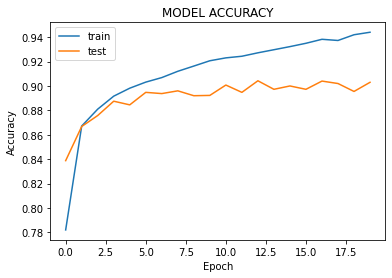

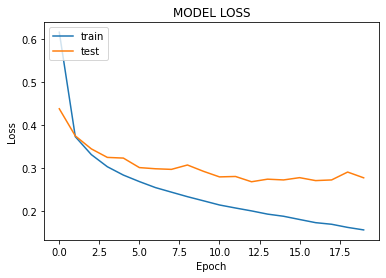

In [ ]:
plot_eval(his)

#### 3) CNN IMPLEMENTATION (with PCA)

(28, 28)


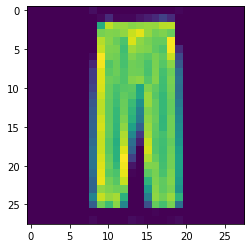

In [ ]:
img = x_train[21]
img = img.reshape(img.shape[0], img.shape[1])
print(img.shape)
plt.imshow(img)

In [ ]:
x_train = convert(x_train)
x_test = convert(x_test)
x_val = convert(x_val)

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
n = 250
pca, pca_train, pca_test, pca_val, var = getPCA(n, x_train, x_test, x_val)
print(f"Variance Ratio: {var}")

Variance Ratio: 0.9647080898284912


In [ ]:
temp1 = pca.inverse_transform(pca_train)
temp2 = pca.inverse_transform(pca_test)
temp3 = pca.inverse_transform(pca_val)

In [ ]:
pca_train = np.reshape(temp1, (pca_train.shape[0], 28, 28, 1))
pca_test = np.reshape(temp2, (pca_test.shape[0], 28, 28, 1))
pca_val = np.reshape(temp3, (pca_val.shape[0], 28, 28, 1))

(28, 28)


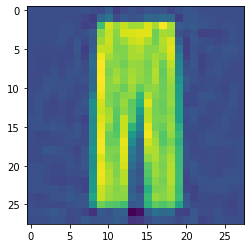

In [ ]:
img = pca_train[21]
img = img.reshape(img.shape[0], img.shape[1])
print(img.shape)
plt.imshow(img)

In [ ]:
pca_model = CNN2D()
pca_his = pca_model.fit(pca_train, y_train, epochs=20, batch_size=250, validation_data=(pca_val, y_val), verbose=1)

Epoch 1/20
240/240 [==============================] - 49s 203ms/step - loss: 0.6019 - accuracy: 0.7878 - val_loss: 0.4366 - val_accuracy: 0.8393
Epoch 2/20
240/240 [==============================] - 48s 200ms/step - loss: 0.3881 - accuracy: 0.8602 - val_loss: 0.4172 - val_accuracy: 0.8460
Epoch 3/20
240/240 [==============================] - 47s 196ms/step - loss: 0.3438 - accuracy: 0.8757 - val_loss: 0.3546 - val_accuracy: 0.8685
Epoch 4/20
240/240 [==============================] - 47s 196ms/step - loss: 0.3186 - accuracy: 0.8845 - val_loss: 0.3594 - val_accuracy: 0.8668
Epoch 5/20
240/240 [==============================] - 47s 195ms/step - loss: 0.3041 - accuracy: 0.8899 - val_loss: 0.3430 - val_accuracy: 0.8752
Epoch 6/20
240/240 [==============================] - 47s 196ms/step - loss: 0.2904 - accuracy: 0.8949 - val_loss: 0.3218 - val_accuracy: 0.8852
Epoch 7/20
240/240 [==============================] - 47s 196ms/step - loss: 0.2759 - accuracy: 0.9006 - val_loss: 0.3255 - val_ac

In [ ]:
pca_model.evaluate(pca_test, y_test, batch_size=250)

24/24 [==============================] - 0s 4ms/step - loss: 0.2836 - accuracy: 0.9045


[0.283618301153183, 0.9045000076293945]

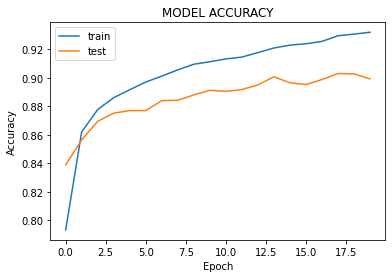

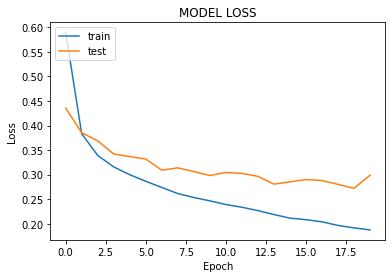

In [ ]:
plot_eval(pca_his)